# Задание № 1 (демонстрационное). Исследовательский анализ данных с помощью Pandas

В этом задании вам нужно использовать Pandas, чтобы ответить на несколько вопросов о взрослых (вам не нужно скачивать данные — они уже есть в репозитории). Выберите ответы в веб-форме.

Уникальные значения признаков (дополнительную информацию см. по ссылке выше):

age: непрерывный;

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked;

fnlwgt: непрерывный;

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool;

education-num: непрерывный;

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse,

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces;

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried;

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black;

sex: Female, Male;

capital-gain: непрерывный.

capital-loss: непрерывный.

hours-per-week: непрерывный.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands;

salary: >50K, <=50K.

In [1]:
import numpy as np
import pandas as pd

pd.set_option("display.max.columns", 100)
# to draw pictures in jupyter notebook
%matplotlib inline
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

In [2]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

In [7]:
data = pd.read_csv(DATA_URL + "adult.data.csv")
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 1. Сколько мужчин и женщин (пол признака) представлено в этом наборе данных?

In [9]:
data['sex'].value_counts()

sex
Male      21790
Female    10771
Name: count, dtype: int64

## 2. Каков средний возраст (возраст женщин)?

In [14]:
data.select_dtypes(include=np.number)[data['sex']=='Female'].mean()

age                   36.858230
fnlwgt            185746.311206
education-num         10.035744
capital-gain         568.410547
capital-loss          61.187633
hours-per-week        36.410361
dtype: float64

## 3. Каков процент граждан Германии (название родной страны)?

In [15]:
data['native-country'].value_counts(normalize=True)

native-country
United-States                 0.895857
Mexico                        0.019748
?                             0.017905
Philippines                   0.006081
Germany                       0.004207
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003255
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                      0.001136
Nicaragua 

## 4–5. Каковы среднее значение и стандартное отклонение возраста для тех, кто зарабатывает более 50 000 долларов в год (функция salary) и тех, кто зарабатывает менее 50 000 долларов в год?

In [26]:
data['age'][data['salary']=='>50K'].mean()

np.float64(44.24984058155847)

In [27]:
data['age'][data['salary']=='>50K'].std()

np.float64(10.519027719851826)

In [28]:
data['age'][data['salary']=='<=50K'].mean()

np.float64(36.78373786407767)

In [29]:
data['age'][data['salary']=='<=50K'].std()

np.float64(14.02008849082488)

## 6. Правда ли, что люди, зарабатывающие более 50 000 долларов, имеют как минимум среднее образование? (образование — Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

In [35]:
data['education'][data['salary']=='>50K'].value_counts(normalize=True)

education
Bachelors       0.283255
HS-grad         0.213621
Some-college    0.176891
Masters         0.122306
Prof-school     0.053947
Assoc-voc       0.046040
Doctorate       0.039026
Assoc-acdm      0.033797
10th            0.007907
11th            0.007652
7th-8th         0.005101
12th            0.004209
9th             0.003443
5th-6th         0.002041
1st-4th         0.000765
Name: proportion, dtype: float64

<Axes: xlabel='salary', ylabel='count'>

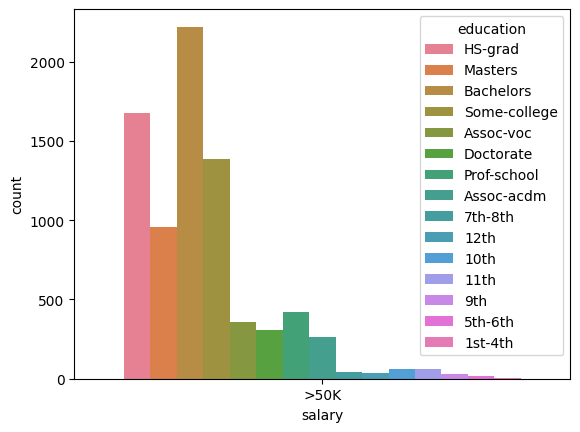

In [41]:
import seaborn as sns
sns.countplot(x="salary", hue="education", data=data[data['salary']=='>50K'])

## 7. Отобразите статистику по возрасту для каждой расы (race признак) и каждого пола (sex признак). Используйте groupby() и describe(). Найдите максимальный возраст мужчин Amer-Indian-Eskimo расы.

In [48]:
colums_to_show = ["race","sex"]

data.groupby(colums_to_show)['age'].describe(percentiles=[])

count       mean        std   min   50%   max
race               sex                                                    
Amer-Indian-Eskimo Female    119.0  37.117647  13.114991  17.0  36.0  80.0
                   Male      192.0  37.208333  12.049563  17.0  35.0  82.0
Asian-Pac-Islander Female    346.0  35.089595  12.300845  17.0  33.0  75.0
                   Male      693.0  39.073593  12.883944  18.0  37.0  90.0
Black              Female   1555.0  37.854019  12.637197  17.0  37.0  90.0
                   Male     1569.0  37.682600  12.882612  17.0  36.0  90.0
Other              Female    109.0  31.678899  11.631599  17.0  29.0  74.0
                   Male      162.0  34.654321  11.355531  17.0  32.0  77.0
White              Female   8642.0  36.811618  14.329093  17.0  35.0  90.0
                   Male    19174.0  39.652498  13.436029  17.0  38.0  90.0

## 8. Среди кого больше тех, кто зарабатывает много (>50K): среди женатых или холостых мужчин (семейное-положение)? К женатым относятся те, у кого семейное-положение начинается с Женат (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальные считаются холостыми.

In [50]:
data['marital-status'][data['salary']=='>50K'].value_counts(normalize=True)

marital-status
Married-civ-spouse       0.853463
Never-married            0.062620
Divorced                 0.059049
Widowed                  0.010840
Separated                0.008417
Married-spouse-absent    0.004336
Married-AF-spouse        0.001275
Name: proportion, dtype: float64

## 9. Сколько часов в неделю человек работает максимум (количество-часов-в-неделю)? Сколько людей работают столько часов и каков процент тех, кто зарабатывает много (>50K), среди них?

In [69]:
max_load = data['hours-per-week'].max()
print(max_load)
num_workaholics = data[data['hours-per-week']==data['hours-per-week'].max()].shape[0]
print(num_workaholics)
rich_share = data[(data['hours-per-week']==max_load) & (data['salary']=='>50K')].shape[0]/num_workaholics
print(rich_share*100)

99
85
29.411764705882355


## 10. Подсчитайте среднее количество рабочих часов (часов-в-неделю) для тех, кто зарабатывает мало и много (зарплата) в каждой стране (родной-стране). Сколько это будет в Японии?

In [72]:
pd.crosstab(
    data['native-country'],
    data['salary'],
    values=data['hours-per-week'],
    aggfunc=np.mean,
).T

native-country,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Holand-Netherlands,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
salary,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
<=50K,40.164760,41.416667,37.914634,37.381818,38.684211,37.985714,42.338235,38.041667,36.030928,40.483333,41.058824,39.139785,41.809524,39.360656,36.325,40.0,34.333333,39.142857,31.3,38.233333,41.44,40.947368,39.625,38.239437,41.000000,40.375,40.003279,36.09375,41.857143,35.068966,38.065693,38.166667,41.939394,38.470588,39.444444,40.15625,33.774194,42.866667,37.058824,38.799127,37.193548,41.6
>50K,45.547945,40.000000,45.641026,38.900000,50.000000,42.440000,47.000000,48.750000,45.000000,44.533333,50.750000,44.977273,50.625000,36.666667,42.750,NaN,60.000000,45.000000,50.0,46.475000,47.50,48.000000,45.400,41.100000,47.958333,40.000,46.575758,37.50000,NaN,40.000000,43.032787,39.000000,41.500000,39.416667,46.666667,51.43750,46.800000,58.333333,40.000000,45.505369,39.200000,49.5
